In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [42]:
df.shape

(3554, 18)

In [43]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf the arbour,sector 63,7.90,20000.0,4.0,4.0,3+,34.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0
1,flat,birla navya,sector 63a,3.70,15417.0,3.0,3.0,3+,1.0,Under Construction,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0
2,flat,deepak minda,manesar,1.20,4528.0,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0
3,house,unitech uniworld resorts,sector 33,11.50,24573.0,5.0,6.0,3+,4.0,Relatively New,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,84.0
4,flat,ireo the corridors,sector 67a,1.85,9531.0,3.0,4.0,3,4.0,New Property,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0


In [44]:
latlong = pd.read_csv('latlong.csv')

In [45]:
latlong

,Sector,Coordinates
0,Sector 1,"28.5176° N, 77.0454° E"
1,Sector 2,"28.5095° N, 77.0320° E"
2,Sector 3,"28.4909° N, 77.0176° E"
3,Sector 4,"28.4738° N, 77.0107° E"
4,Sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,Sector 113,"28.5287° N, 77.0233° E"
125,Sector 114,"28.5334° N, 77.0118° E"
126,Sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4139° N, 77.0324° E"


In [46]:
latlong['latitude'] = latlong['Coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [47]:
latlong['longitude'] = latlong['Coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [48]:
latlong.head()

,Sector,Coordinates,latitude,longitude
0,Sector 1,"28.5176° N, 77.0454° E",28.5176,77.0454
1,Sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,Sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,Sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,Sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [49]:
latlong.rename(columns={'Sector': 'sector'}, inplace=True)

In [54]:
latlong['sector'] = latlong['sector'].str.lower()

In [55]:
latlong

,sector,Coordinates,latitude,longitude
0,sector 1,"28.5176° N, 77.0454° E",28.5176,77.0454
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176
...,...,...,...,...
124,sector 113,"28.5287° N, 77.0233° E",28.5287,77.0233
125,sector 114,"28.5334° N, 77.0118° E",28.5334,77.0118
126,sector 115,"28.5385° N, 77.0061° E",28.5385,77.0061
127,gwal pahari,"28.4139° N, 77.0324° E",28.4139,77.0324


In [56]:
df

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf the arbour,sector 63,7.90,20000.0,4.0,4.0,3+,34.0,Under Construction,3950.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0
1,flat,birla navya,sector 63a,3.70,15417.0,3.0,3.0,3+,1.0,Under Construction,2667.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0
2,flat,deepak minda,manesar,1.20,4528.0,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0
3,house,unitech uniworld resorts,sector 33,11.50,24573.0,5.0,6.0,3+,4.0,Relatively New,4680.0,0.0,1.0,0.0,0.0,0.0,1.0,84.0
4,flat,ireo the corridors,sector 67a,1.85,9531.0,3.0,4.0,3,4.0,New Property,1941.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,house,tata primanti,sector 72,8.60,12286.0,4.0,5.0,3+,3.0,Relatively New,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
3550,flat,dlf regency park,sector 28,1.35,11989.0,2.0,2.0,2,1.0,Moderately Old,1109.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3551,flat,sahara grace,sector 28,4.30,12421.0,3.0,4.0,3,5.0,Old Property,3133.0,0.0,1.0,1.0,0.0,0.0,1.0,24.0
3552,flat,godrej aria,sector 79,1.10,7774.0,2.0,2.0,3+,4.0,New Property,1223.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0


In [57]:
new_df = df.merge(latlong, on='sector')

In [58]:
new_df.shape

(3308, 21)

In [59]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'Coordinates', 'latitude', 'longitude'],
      dtype='object')

In [60]:
group_df = new_df.groupby('sector').mean(numeric_only=False)[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']]

/var/folders/nt/bw42sh497ng1qc3sjw7tqrkh0000gn/T/ipykernel_67004/2329773174.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  group_df = new_df.groupby('sector').mean(numeric_only=False)[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']]


In [83]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4139,77.0324
manesar,0.962258,4608.064516,2027.367742,28.3362,76.9314
sector 1,1.860000,8249.833333,2327.833333,28.5176,77.0454
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.480545,5602.509091,995.981818,28.4172,76.9081


In [68]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [66]:
pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 7.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0
Note: you may need to restart the kernel to use updated packages.


In [69]:
new_df.to_csv('data_viz1.csv',index=False)

In [70]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [71]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,4 BHK Flat in Sector 63 Gurgaon,flat,dlf the arbour,7.90,20000.0,3950.0,Built Up area: 3950 (366.97 sq.m.)Carpet area:...,4,4,3+,not available,"A341, Sector 63 Gurgaon, Gurgaon, Haryana",34.0,NaN,Jan 2028,"['Radhakrishna Shani Mandir', 'pracksht hospit...","Dlf arbour apartment for sell, builder buyer a...",[],NaN,NaN
1,3 BHK Flat in Sector 63A Gurgaon,flat,birla navya,3.70,15416.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3,3+,not available,"Sector 63A Gurgaon, Gurgaon, Haryana",1.0,North,By 2024,"['Sector 54 Chowk Metro Station', 'WorldMark G...",Premium unit in birla navya drisha 1 with base...,[],"['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Environment4 out of 5', 'Safety5 out of 5', ..."
2,3 BHK Flat in Sector 1A IMT Manesar,flat,deepak minda,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3,3,3+,servant room,"Sector 1A IMT Manesar, Gurgaon, Haryana",6.0,North-West,5 to 10 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",Deepak minda sec-1 imt manesar...................,"['7 Fan', '7 Light', 'No AC', 'No Bed', 'No Ch...","['Piped-gas', 'Rain Water Harvesting']",NaN
3,5 Bedroom House for sale in Sector 33 Gurgaon,house,unitech uniworld resorts,11.50,24573.0,4680.0,Plot area 520(434.79 sq.m.),5,6,3+,servant room,"Sector 33 Gurgaon, Gurgaon, Haryana",4.0,East,1 to 5 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Stan...","500 sqyd villas with front and rear lawns , pr...","['5 Wardrobe', '6 Fan', '18 Light', 'No AC', '...","['Private Garden / Terrace', 'High Ceiling Hei...","['Environment3 out of 5', 'Safety4 out of 5', ..."
4,3 BHK Flat in Sector 67A Gurgaon,flat,ireo the corridors,1.85,9531.0,1941.0,Built Up area: 1941 (180.32 sq.m.),3,4,3,"study room,store room","A-000, Sector 67A Gurgaon, Gurgaon, Haryana",4.0,East,0 to 1 Year Old,"['Huda Metro Station (Gurugram)', 'Paras Trini...",Brokers please excuse\n3 bhk +servant room + s...,"['3 Fan', '1 Exhaust Fan', '3 Geyser', '3 Ligh...","['Water purifier', 'Security / Fire Alarm', 'P...","['Environment5 out of 5', 'Lifestyle4 out of 5..."


In [72]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [73]:
wordcloud_df.head()

,features,sector
0,NaN,sector 63
1,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 63a
2,"['Piped-gas', 'Rain Water Harvesting']",manesar
3,"['Private Garden / Terrace', 'High Ceiling Hei...",sector 33
4,"['Water purifier', 'Security / Fire Alarm', 'P...",sector 67a


In [74]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [75]:
main

['Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Piped-gas',
 'Rain Water Harvesting',
 'Private Garden / Terrace',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Recently Renovated',
 'Visitor Parking',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Water purifier',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Per

In [76]:
from wordcloud import WordCloud

In [77]:
feature_text = ' '.join(main)

In [78]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [79]:
feature_text

'Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Visitor Parking Swimming Pool Park Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Piped-gas Rain Water Harvesting Private Garden / Terrace High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Recently Renovated Visitor Parking Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Water purifier Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) High Ceiling Height Maintenance Staff Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / C

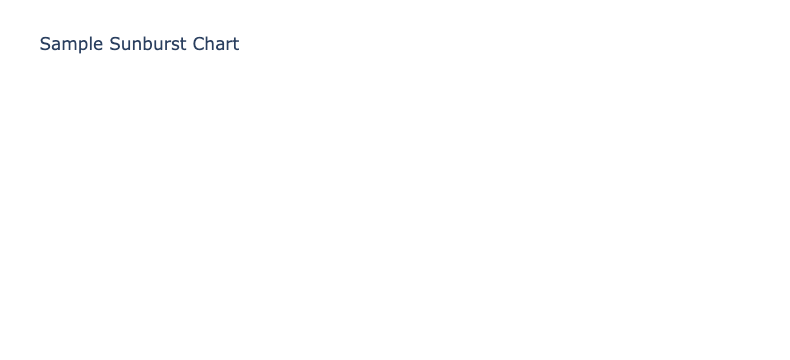

In [84]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

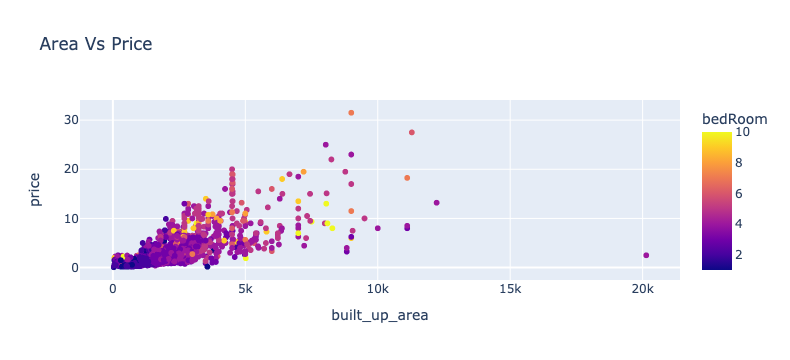

In [85]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

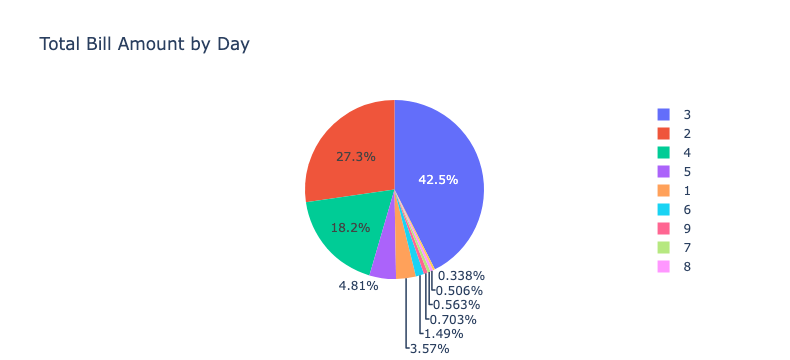

In [86]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

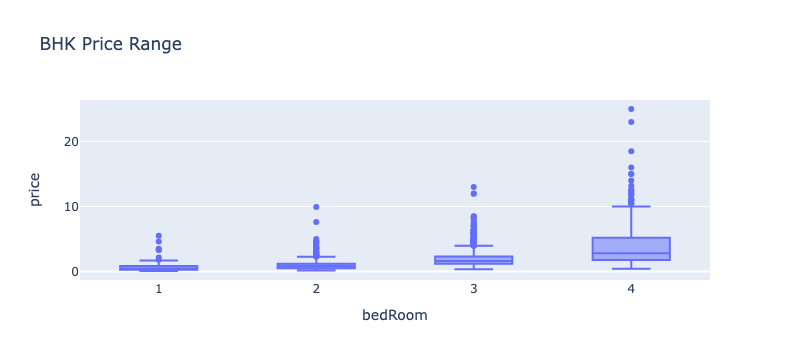

In [87]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

/var/folders/nt/bw42sh497ng1qc3sjw7tqrkh0000gn/T/ipykernel_67004/3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/nt/bw42sh497ng1qc3sjw7tqrkh0000gn/T/ipykernel_67004/3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

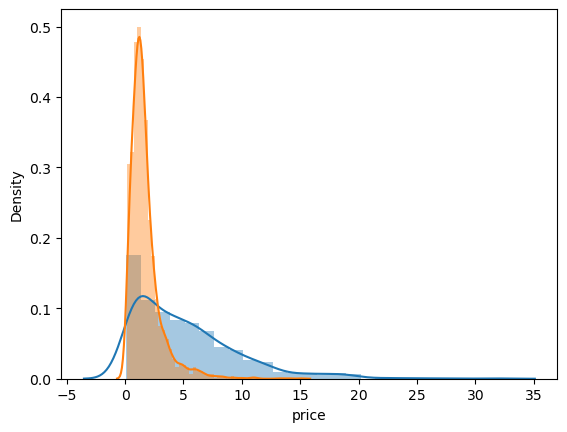

In [88]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [89]:
new_df['sector'].unique().tolist().insert(0,'overall')